In [ ]:
!pip install scikit-learn==1.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 93.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset (update the filename if necessary)
df = pd.read_csv('/content/updated_pollution_dataset.csv')

# Display basic info
print(df.info())

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


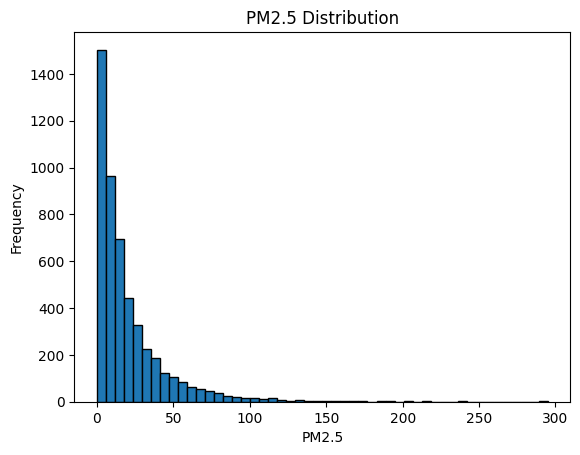

In [ ]:
import matplotlib.pyplot as plt

# Visualize PM2.5 distribution
plt.hist(df['PM2.5'].dropna(), bins=50, edgecolor='k')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('PM2.5 Distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Air Quality (if using classification)
le = LabelEncoder()
df['Air Quality'] = le.fit_transform(df['Air Quality'])

df.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
features = ['Temperature', 'Humidity', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,-0.034080,-0.690715,5.2,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,2
1,-0.257295,0.349507,2.3,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,2
2,-1.031106,0.292768,26.7,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,2
3,-0.435867,-1.951591,6.1,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,0
4,-0.525153,0.040593,6.9,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,0


In [ ]:
from sklearn.model_selection import train_test_split

# Predicting PM2.5 (Regression)
X = df[features]
y = df['PM2.5']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 4000, Testing Samples: 1000


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 3.3086
Mean Squared Error (MSE): 20.8521
R² Score: 0.9588


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target for classification
X_cls = df[features]
y_cls = df["Air Quality"]

# Split into training (80%) and testing (20%)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Initialize model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_cls, y_train_cls)

# Predictions
y_pred_cls = rf_classifier.predict(X_test_cls)

# Evaluation metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test_cls, y_pred_cls))


Accuracy: 0.9620
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.89      0.90       111
           2       0.97      0.97      0.97       294
           3       0.89      0.91      0.90       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
import pickle
from sklearn.linear_model import LinearRegression

# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Save the regression model
with open("regression_model.pkl", "wb") as f:
    pickle.dump(regression_model, f)

print("Regression model saved successfully!")


Regression model saved successfully!


In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Or the classifier you used

# Train the classification model
classification_model = RandomForestClassifier()
# Use the correct variable names for classification training data
classification_model.fit(X_train_cls, y_train_cls)

# Now save using pickle
import pickle
with open("classification_model.pkl", "wb") as f:
    pickle.dump(classification_model, f)

print("Model saved successfully!")

Model saved successfully!
